In [24]:
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm
import math, operator, warnings
import matplotlib.pyplot as plt 
from prettytable import PrettyTable

In [25]:
data = pd.read_csv('/content/drive/MyDrive/IR A3 Data/wiki.csv')
data.head()

,source,target
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478


In [26]:
def dictionarymake(vertex):
  storenodes={}
  for iterator in vertex:
    if iterator not in storenodes:
        storenodes[iterator]=1
    else:
        storenodes[iterator]+=1
  return storenodes

In [27]:

def calculatethedegree(vertex,check):
    storenodes = dictionarymake(vertex)
    if not check:
        return sum(storenodes.values())/7115
    elif check == -1:
        return storenodes
    elif check == 1:
        return list((dict(sorted(storenodes.items(),key=operator.itemgetter(1),reverse=True))).keys())[0]
    else:
        return dictionarymake(list(storenodes.values()))

In [28]:
t = PrettyTable(["Attribute of the Wiki-Vote Network","VALUE"])
n = len(set(list(data['source'])+list(data['target'])))
t.add_row(["TOTAL NUMBER OF EDGES IN THE NETWORK",str(len(data))])
t.add_row(["-"*50,"-"*50])
t.add_row(["TOTAL NUMBER OF NODES IN THE NETWORK",str(n)])
t.add_row(["-"*50,"-"*50])
calValue = calculatethedegree(data['target'],1)
t.add_row(["NODE WITH MAXIMUM IN-DEGREE IN THE NETWORK",str(calValue)])
t.add_row(["-"*50,"-"*50])
calValue = calculatethedegree(data['source'],1)
t.add_row(["NODE WITH MAXIMUM OUT-DEGREE IN THE NETWORK", str(calValue)])
t.add_row(["-"*50,"-"*50])
calValue = round(calculatethedegree(data['target'],0),2)
t.add_row(["AVERAGE IN-DEGREE IN THE NETWORK",str(calValue)])
t.add_row(["-"*50,"-"*50])
calValue = round(calculatethedegree(data['source'],0), 2)
t.add_row(["AVERAGE OUT-DEGREE IN THE NETWORK",str(calValue)])
t.add_row(["-"*50,"-"*50])
calValue = round(len(data)/(n*(n-1)),3)
t.add_row(["DENSITY OF THE NETWORK",str(calValue)])
print(t)

+----------------------------------------------------+----------------------------------------------------+
|         Attribute of the Wiki-Vote Network         |                       VALUE                        |
+----------------------------------------------------+----------------------------------------------------+
|        TOTAL NUMBER OF EDGES IN THE NETWORK        |                       103689                       |
| -------------------------------------------------- | -------------------------------------------------- |
|        TOTAL NUMBER OF NODES IN THE NETWORK        |                        7115                        |
| -------------------------------------------------- | -------------------------------------------------- |
|     NODE WITH MAXIMUM IN-DEGREE IN THE NETWORK     |                        4037                        |
| -------------------------------------------------- | -------------------------------------------------- |
|    NODE WITH MAXIMUM OUT-D

In [29]:
def Findedgescreatelist(data):
  listofedges=[]
  for i in range(len(data)):
    col1 = data.iloc[i,0]
    col2 = data.iloc[i,1]#change data 
    listofedges.append((col1, col2))
  return listofedges

In [30]:
listofedges = Findedgescreatelist(data)
count = 1
print("Edge Representation of Network")
list1=[]
for eachEdge in listofedges:
  list1.append(str(eachEdge))
  #print(str(eachEdge))
  count+=1
  if(count==1000):
    break

print(list1)

Edge Representation of Network
['(30, 1412)', '(30, 3352)', '(30, 5254)', '(30, 5543)', '(30, 7478)', '(3, 28)', '(3, 30)', '(3, 39)', '(3, 54)', '(3, 108)', '(3, 152)', '(3, 178)', '(3, 182)', '(3, 214)', '(3, 271)', '(3, 286)', '(3, 300)', '(3, 348)', '(3, 349)', '(3, 371)', '(3, 567)', '(3, 581)', '(3, 584)', '(3, 586)', '(3, 590)', '(3, 604)', '(3, 611)', '(3, 8283)', '(25, 3)', '(25, 6)', '(25, 8)', '(25, 19)', '(25, 23)', '(25, 28)', '(25, 29)', '(25, 30)', '(25, 33)', '(25, 35)', '(25, 50)', '(25, 54)', '(25, 55)', '(25, 75)', '(25, 80)', '(25, 86)', '(25, 94)', '(25, 127)', '(25, 152)', '(25, 154)', '(25, 182)', '(25, 192)', '(25, 214)', '(25, 224)', '(25, 226)', '(25, 246)', '(25, 252)', '(25, 255)', '(25, 257)', '(25, 261)', '(25, 271)', '(25, 273)', '(25, 280)', '(25, 282)', '(25, 286)', '(25, 299)', '(25, 300)', '(25, 302)', '(25, 306)', '(25, 308)', '(25, 310)', '(25, 322)', '(25, 325)', '(25, 339)', '(25, 348)', '(25, 349)', '(25, 356)', '(25, 358)', '(25, 363)', '(25, 37

In [31]:
attributes = list(set(list(data['source'])+list(data['target'])))
creatematrix = pd.DataFrame(index=attributes,columns=attributes)
creatematrix = creatematrix.fillna(0)
for iterator in listofedges:
    creatematrix[iterator[0]][iterator[1]]=1
print("ADJACENCY MATRIX")
display(creatematrix)

ADJACENCY MATRIX


,3,4,5,6,7,8,9,10,11,12,...,8288,8289,8290,8291,8292,8293,8294,8295,8296,8297
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
def showGraph(data,x_vals,y_vals,xlabel,title):
  plt.figure(figsize=[25,10])
  plt.scatter(list(data.keys()),list(data.values()))
  plt.title(title,fontsize=12)
  plt.xlabel(xlabel,fontsize=12)
  plt.xticks(x_vals,fontsize=12)
  plt.yticks(y_vals,fontsize=12)
  plt.ylabel("Number of Nodes of the network",fontsize=10)
  plt.grid()
  plt.show()

In [33]:
def create1(totalcount, mvl):
  vls = []
  for iterator in range(1, totalcount):
      if(iterator % mvl == 0 or iterator == 1):
          vls.append(iterator)
  return vls

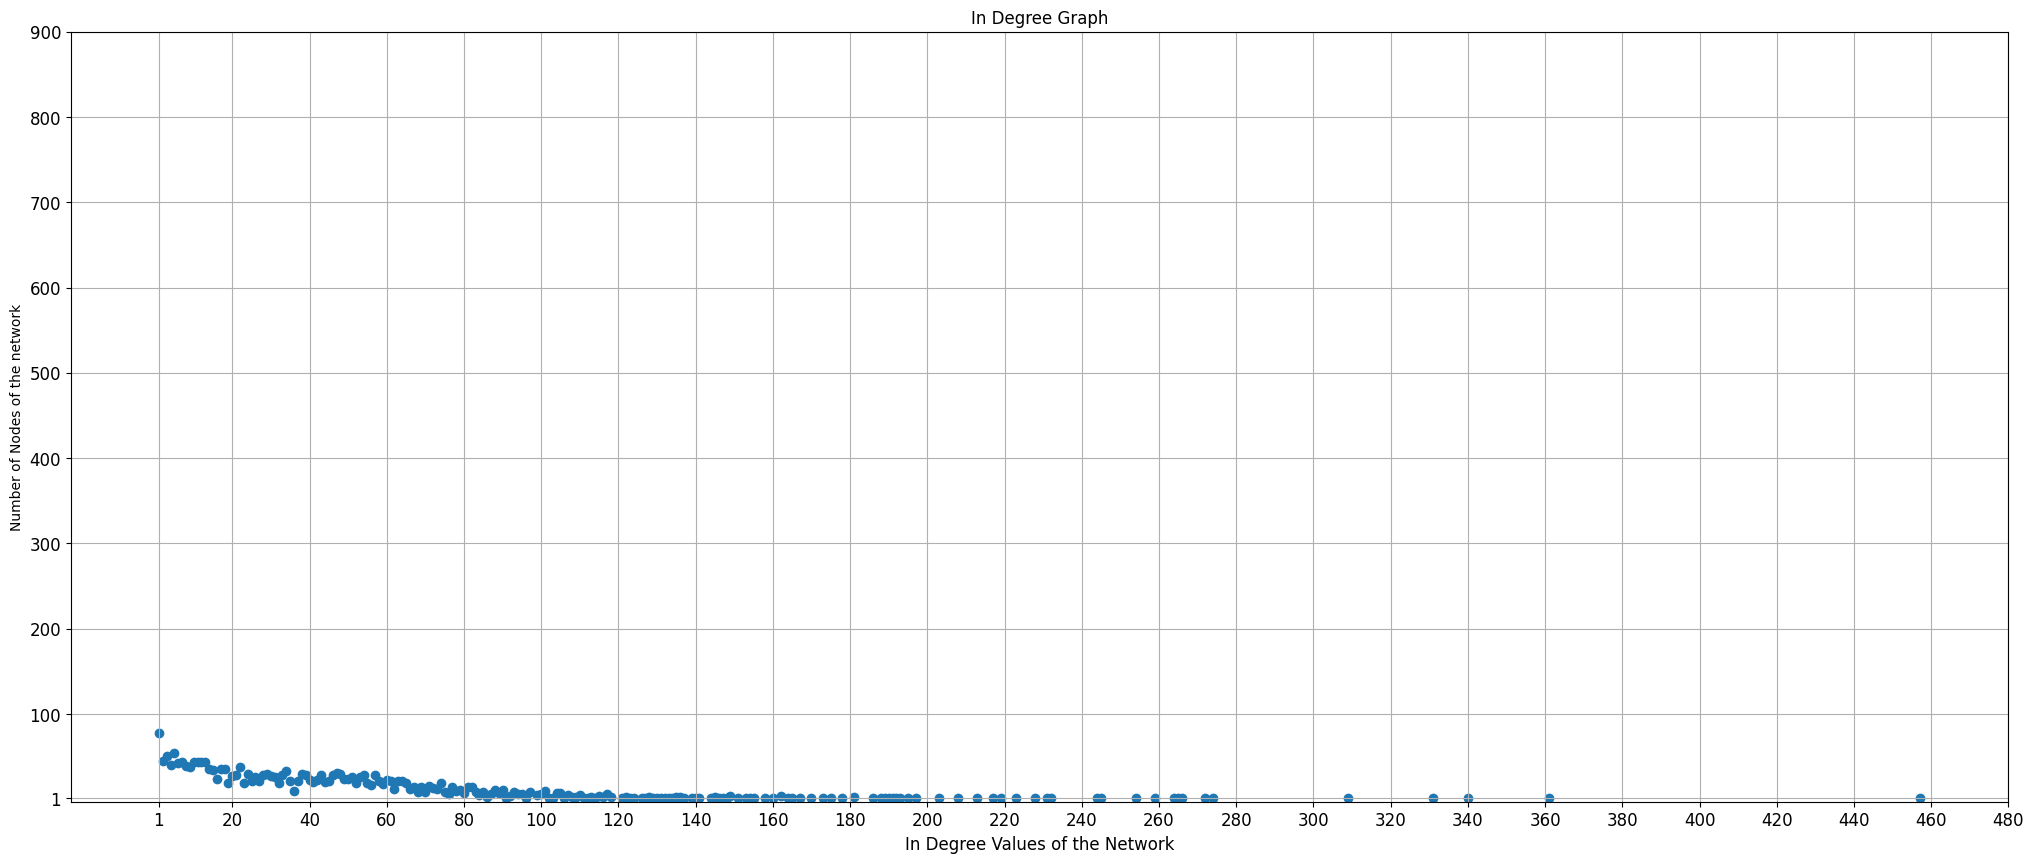

In [34]:
countind = calculatethedegree(data['target'],2)
showGraph(countind,create1(500, 20),create1(1000, 100), "In Degree Values of the Network","In Degree Graph")

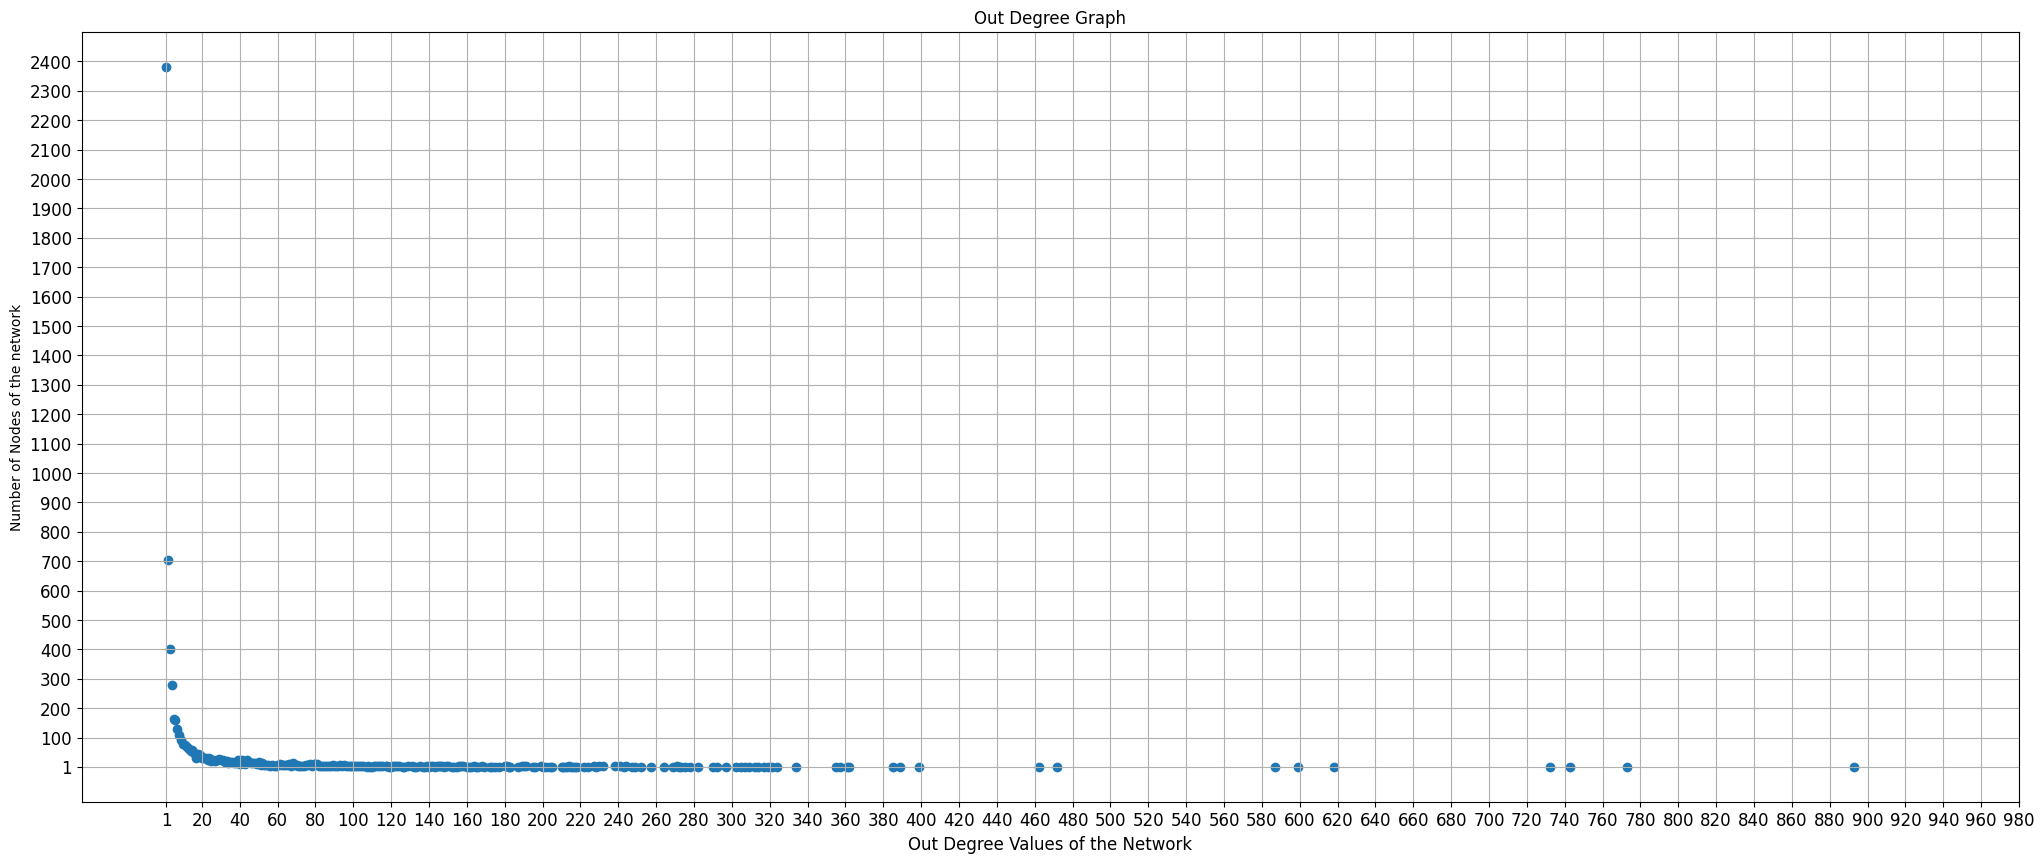

In [35]:
countout = calculatethedegree(data['source'],2)
showGraph(countout, create1(1000, 20), create1(2500, 100), "Out Degree Values of the Network", "Out Degree Graph")

In [36]:

def find1(vertex,creatematrix):
  find2,n1=0,[]
  for j in vertex:
      if creatematrix[iterator][j]:
          n1.append(j)
  for k in n1:
      for k2 in n1:
          if creatematrix[k][k2]:
              find2 += 1
  return n1,find2

In [37]:
print("Clustering Coefficient Of Each Node of the Network\n")
vertex = list(set(list(data['source'])+list(data['target'])))
clust_coeff = {}
for iterator in tqdm(vertex, leave=True, position=0):
  n1, find2 = find1(vertex, creatematrix)
  try:
      clust_coeff[iterator] = (find2)/(len(n1)*(len(n1)-1))
  except:
      clust_coeff[iterator] = 0
t1 = PrettyTable(['Node Number','Clustering Coeffient Value of the Node'])
for i in dict(sorted(clust_coeff.items(),key=operator.itemgetter(1),reverse=True)):
    t1.add_row([i,clust_coeff[i]])
print(t1)

Clustering Coefficient Of Each Node of the Network



100%|██████████| 7115/7115 [07:52<00:00, 15.07it/s]


+-------------+----------------------------------------+
| Node Number | Clustering Coeffient Value of the Node |
+-------------+----------------------------------------+
|     444     |                  1.0                   |
|     498     |                  1.0                   |
|     666     |                  1.0                   |
|     910     |                  1.0                   |
|     1199    |                  1.0                   |
|     1214    |                  1.0                   |
|     1444    |                  1.0                   |
|     1782    |                  1.0                   |
|     1923    |                  1.0                   |
|     1979    |                  1.0                   |
|     2293    |                  1.0                   |
|     3689    |                  1.0                   |
|     3809    |                  1.0                   |
|     3851    |                  1.0                   |
|     3999    |                

In [38]:
def calCounts(clust_coeff):
  count0, count1 = 0, 0 
  for i in clust_coeff:
    if not clust_coeff[i]:
        count0 += 1
    if clust_coeff[i] == 1:
        count1 += 1
  return count0, count1

In [39]:
uniqueCCV = []
for x , y in clust_coeff.items():
  if y not in uniqueCCV:
    uniqueCCV.append(y)

In [40]:
df = pd.DataFrame(columns = ['NodeNumber','CCValue'])

In [41]:
df['NodeNumber'] = clust_coeff.keys()
df['CCValue'] = clust_coeff.values()

In [42]:
x = list(df['NodeNumber'])
y = list(df['CCValue'])

In [43]:
 l3 = df['CCValue'].value_counts()

In [44]:
 df1 = pd.DataFrame(l3)

In [45]:
valuess = list(df1.index)
ccValues = list(df1.CCValue)

Text(0.5, 0, 'Clustering Coefficient Value of the nodes')

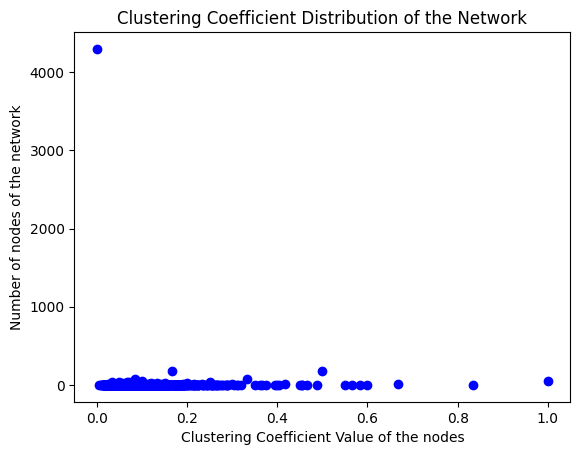

In [46]:
plt.scatter(valuess,ccValues,color='Blue')
plt.title('Clustering Coefficient Distribution of the Network')
plt.ylabel('Number of nodes of the network')
plt.xlabel('Clustering Coefficient Value of the nodes')


In [47]:
count0, count1 = calCounts(clust_coeff)
print("Number of Nodes having Clustering Coefficient Value 0 =",str(count0))
print("Number of Nodes having Clustering Coefficient Value 1 =",str(count1))
print("Final Clustering Coefficient of the Network = ",str(sum(list(clust_coeff.values()))/len(vertex)))

Number of Nodes having Clustering Coefficient Value 0 = 4297
Number of Nodes having Clustering Coefficient Value 1 = 45
Final Clustering Coefficient of the Network =  0.060885242517651504
